Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150


Своими руками (т.е. без использования статистических функций вроде mean, std, var) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [3]:
import numpy as np

a = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])

Среднее арифметическое - сумма всех чисел массива, делённое на их количества.

In [4]:
mean = a.sum()/a.size

mean


73.14285714285714

In [5]:
a.mean()

73.14285714285714

Смещённая и несмещённая оценки дисперсии
Дисперсия - мера разброса СВ относительно её математического ожидания. Единица измерения - квадрат той величины, дисперсию которой расчитываем.
Квадратный корень дисперсии - СКО
Дисперсия рассчитывается, как математическое ожидание квадратов расстояний между СВ и её математическим ожиданием.
Выборочная дисперсия - оценка теоретической дисперсии распределения, рассчитанная на основе данных выборки. Она является смещённой оценкой теоретической дисперсии. 
Исправленная выборочная дисперсия - несмещённой. Несмещённую оценку дисперсии можно получить, домножив смещённую на (n-1)/n, где n - число элементов выборки. Считается, что исправленная выборочная дисперсия показывает оценку дисперсии для всех вариантов генеральной совокупности.

In [7]:
D = ((a - mean) ** 2).sum()/a.size # смещённая дисперсия

In [8]:
D

2135.0748299319725

In [9]:
a.var()

2135.0748299319725

In [10]:
sigma_2 = D * (a.size/(a.size-1)) 
sigma_2

2241.828571428571

В больших выборках относительная разница между смещённой и несмещённой дисперсией практически отсутствует. Математически можно доказать, что предел ряда n/(n-1) при росте n стремится к единице, а с точки зрения здравого смысла - чем больше опытов мы проводим, тем ближе наша оценка к оценке генеральной совокумности.

Среднее квадратичное отклонение (СКО, стандартное отклонение) - квадратный корень из дисперсии. Показывает рассеяние СВ относительно её математического ожидания. 

In [11]:
sigma = D ** 0.5 # если нам потребуется оценка СКО, возьмём кварарт от sigma_2
sigma

46.206869943028735

In [12]:
a.std()

46.206869943028735

Задача 2

Для выборки из задачи 1 найти (также без использования статистических функций) медиану, первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot.

В этой задаче неоднозначности в вычислении квантилей можно разрешать любым способом.

Медианой называется число, характеризующее выборку. Если элементы выборки различны, медиана - такое число выборки, что ровно половина из элементов выборки больше него, а другая - меньше. 
Медиана ищется по упорядоченной выборке (среднее число, либо половина суммы двух "средних" чисел, когда количество чисел в выборке чётно). Для СВ медиана такое число, которое делит распределение чисел пополам. Также называется вторым квартилем (50-м персентилем, 0,5-квантилем) распределения.


In [13]:
a.size # в нашем случае количество элементов нечётно, можем найти точное число, как номер элемента ряда

21

In [25]:
a.sort()
n = int((a.size + 1)/2)
a[n-1] # помним, что отсчёт начинается с 0

70

In [34]:
import matplotlib.pyplot as plt

Формально можно сказать, что медиана - это значение признака, который лежит в основе ранжированного ряда и делит этот ряд на две равные по численности части.
Квартилями (кварт - четверть) называется значение признака в ранжированном ряду распределения, выборанные таким образом, что 25% единиц выборки будут меньше по величине числу Q1, четверть выборки будет находиться между Q1 (нижний) и Q2, ещё честверсть между Q2 и Q3 (верхний) и остальные 25% больше Q3. Q2 - медиана, второй квартиль.
Первая и последняя четверть упорядоченного ряда ищется ниже.

In [27]:
n_q1 = (a.size + 1) / 4
n_q1 # видим, что число не целое. Следовательно, возьмём среднее арифметическое из
# пятого и шестого элемента

5.5

In [29]:
q1 = (a[4] + a[5]) / 2 
q1

39.0

In [30]:
# аналогичным образом ищем третий квартиль
n_q3 = n_q1 * 3
n_q3

16.5

In [31]:
q3 = (a[15] + a[16]) / 2
q3

86.5

In [32]:
# Интерквартильное расстояние или интерквартильный размах - разность между q3 и q1
q3 - q1


47.5

[ 17  24  25  30  33  45  55  57  65  65  70  75  75  77  80  84  89  90
 100 150 230]


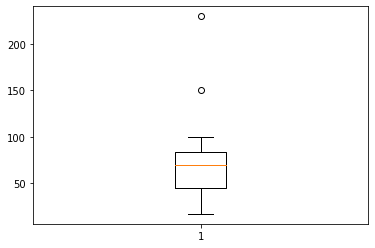

In [36]:
plt.boxplot(a)
print(a)

Две точки выше "верхнего уса" являются выборосами.

Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Вероятность того, что будет выбран студент из группы А - 1/4, B - 1/4, С - 1/2. (x+x+2x = 4x; x/4x; x/4x; 2x/4x)
Событие H - студент сдал первую сессию.
Посчитаем полную вероятность события H - выбранный студент сдал первую сессию:

In [37]:
P_H = 0.25 * 0.8 + 0.25 * 0.7 + 0.5 * 0.9

0.825

Посчитаем вероятности событий при условии H:

In [41]:
P_A_H = 0.25 * 0.8 / P_H
P_A_H

0.24242424242424246

In [43]:
P_B_H = 0.25 * 0.7 / P_H
P_B_H

0.21212121212121213

In [44]:
P_C_H = 0.5 * 0.9 / P_H
P_C_H

0.5454545454545455